In [77]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data

### Simulation Based Approach

* population: 1000 lottery tickets produced by Codeup
* parameter we interested: win rate. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

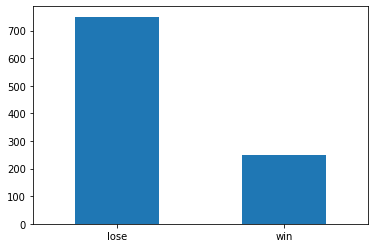

In [61]:
# Create the lottery ticket population: 250 wins and 750 loses

tickets = pd.Series([True]*250 + [False]*750)
tickets

# Visualize the distribution

tickets.value_counts().set_axis(['lose', 'win']).plot.bar()
plt.xticks(rotation=0)

In [4]:
# Take a random sample of 25 tickets

n=25
tickets.sample(n).mean()

0.32

In [5]:
# Use the list comprehension to generate the 5 random samples

[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.12, 0.24, 0.2, 0.24]

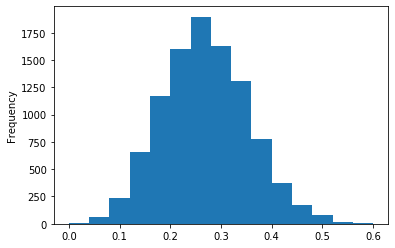

In [7]:
# Test Central Limit 

calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [37]:
se = math.sqrt((0.25*0.75)/n)
se

0.08660254037844387

In [57]:
calculated_winrates.agg(['mean','std'])

mean    0.249700
std     0.085616
dtype: float64

In [59]:
# Calculate the p-value

mean = calculated_winrates.agg(['mean','std'])['mean']
std = calculated_winrates.agg(['mean','std'])['std']

stats.norm(mean, std).cdf(0.2)

0.2807899382069138

In [54]:
six_dice = np.random.randint(low=1, high=7, size=(1000000, 6))
six_dice = pd.DataFrame(six_dice)
six_dice['total'] = six_dice.mean(axis=1).round(1)
six_dice.sample(5)

,0,1,2,3,4,5,total
467889,5,6,4,1,6,1,3.8
295730,5,4,1,3,5,5,3.8
225397,4,6,1,2,2,3,3.0
875361,5,2,6,6,5,5,4.8
34932,6,3,6,6,4,2,4.5


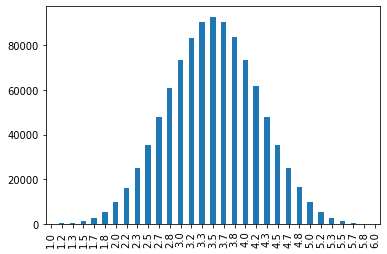

In [55]:
six_dice.total.value_counts().sort_index().plot(kind='bar')

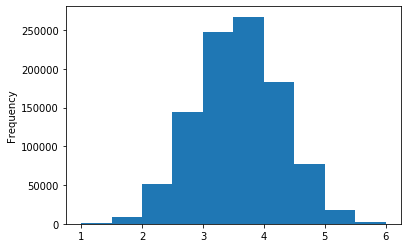

In [56]:
six_dice['total'].plot(kind='hist')

* H0: The average grades in web development are the same as the data science classes
* Ha: The average grades in web development are different as the data science classes

TN: H0 is true and we don't reject it. 
TP: Ha is true and we reject the H0
Type I: H0 is true but we reject the H0
Type II: H0 is false  but we didn't reject it. 

* H0: There is no relationship between how early a student shows up and their grade
* Ha: There is a relationship between how early a student shows up and their grade

* H0: Both Web dev and data science students are equally likely to be coffee drinkers
* Ha: One major is more likely to be coffee drinkers

### Load the mpg dataset and use it to answer the following questions:

In [3]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Text(0.5, 1.0, 'Feul efficiency in hwy for cars from 1999')

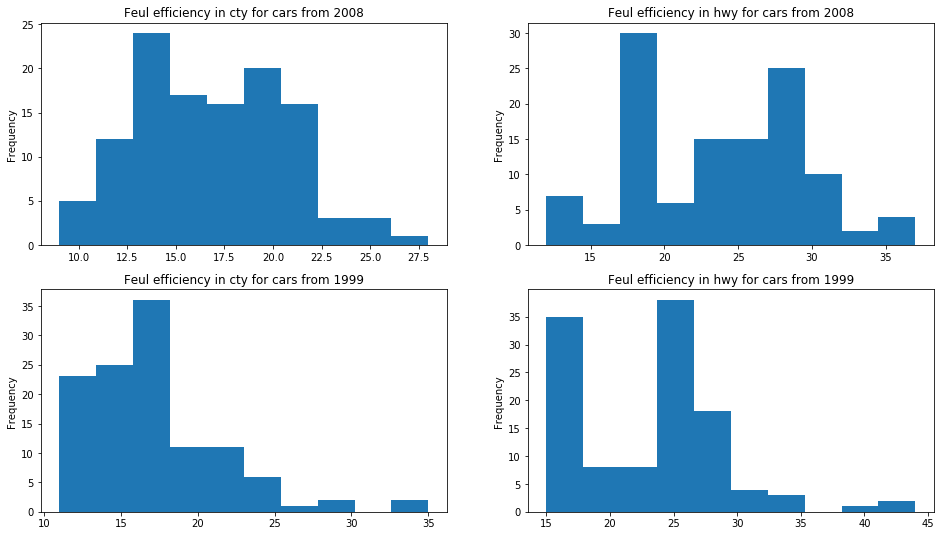

In [22]:
# Need cars from 2008 and 1999

boolean_2008 = (mpg.year == 2008)
boolean_2008

cars_2008 = mpg[boolean_2008]
cars_2008.head()

# It has two fuel-efficiency: cty and hwy

plt. figure(figsize=(16,9))

plt.subplot(2,2,1)
cars_2008.cty.plot(kind='hist')
plt.title('Feul efficiency in cty for cars from 2008')

plt.subplot(2,2,2)
cars_2008.hwy.plot(kind='hist')
plt.title('Feul efficiency in hwy for cars from 2008')

boolean_1999 = (mpg.year == 1999)
boolean_1999

cars_1999 = mpg[boolean_1999]
cars_1999.head()

plt.subplot(2,2,3)
cars_1999.cty.plot(kind='hist')
plt.title('Feul efficiency in cty for cars from 1999')

plt.subplot(2,2,4)
cars_1999.hwy.plot(kind='hist')
plt.title('Feul efficiency in hwy for cars from 1999')

B. Hypothesis:

H0: No difference in feul-efficiency in cty in cars from 2008 vs. 1999.
Ha: Difference exists in feul-efficiency in cty in cars from 2008 vs. 1999

C. Set Alpha
alpah = 0.05

In [27]:
# D. Verify Assumptions

cars_2008.cty.size
cars_2008.hwy.size
cars_1999.cty.size
cars_1999.cty.size

117

In [28]:
# E. compute test statistic and probability

t, p = stats.ttest_ind(cars_2008.cty, cars_1999.cty, equal_var=False)
t, p

(-0.5674988409997608, 0.5709289258613233)

In [34]:
# Decide: 
# since p > alpha
# Accept the null hypothesis: there is no difference in feul-efficiency in city for cars from 2008 vs. 1999

In [32]:
t, p = stats.ttest_ind(cars_2008.hwy, cars_1999.hwy, equal_var=False)
t, p

(0.03286431672888292, 0.973811089269393)

In [87]:
# Decide: 
# since p > alpha
# Accept the null hypothesis: there is no difference in feul-efficiency in hwy for cars from 2008 vs. 1999

### 2. Are compact cars more fuel-efficient than the average car?
**1. To compare the fuel-efficiency of compact cars against all the cars**<br>
**2. One sample t-test, one tail**<br>
**3. Continuous variable: cty and hwy mileages**<br>

In [39]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
92,ford,mustang,3.8,1999,6,auto(l4),r,18,25,r,subcompact
94,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
214,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact
109,hyundai,sonata,2.4,1999,4,auto(l4),f,18,26,r,midsize
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact


In [76]:
# Pull information for compact cars

boolean_compact = mpg['class'] == 'compact'
cars_compact = mpg[boolean_compact]
cars_compact.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact
195,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact
187,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact
219,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


### A. Plot Distribution

Text(0.5, 1.0, 'Feul efficiency in hwy for compact cars')

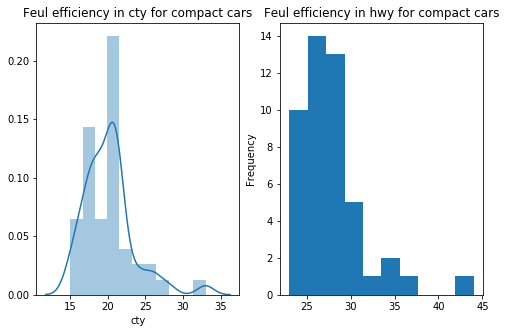

In [88]:
plt. figure(figsize=(8,5))

plt.subplot(1,2,1)

sns.distplot(cars_compact.cty)
plt.title('Feul efficiency in cty for compact cars')

plt.subplot(1,2,2)
cars_compact.hwy.plot(kind='hist')
plt.title('Feul efficiency in hwy for compact cars')

### B. Set Hypothesis

$H_01$: Compact cars are the same as the average regarding fuel efficiency in cities.<br>
$H_a1$: Compact cars are more fuel-efficient than the average in cities.<br>

$H_02$: Compact cars are the same as the average regarding fuel efficiency in highways.<br>
$H_a2$: Compact cars are more fuel-efficient than the average in highways.<br>

### C. Set alpha
alpha = 0.05

### D. Verifiy Assumpation

In [81]:
cars_compact.shape

(47, 11)

### E. Compute the statistic and probability

In [47]:
t, p = stats.ttest_1samp(cars_compact.cty, mpg.cty.mean())
t, p

(6.6191042534408915, 3.4017448216394005e-08)

In [82]:
t > 0 and p/2 < 0.05

True

**Reject the null hypothesis and accept the alternative**<br>
Compact cars are more fuel-efficient than the average in cities.

In [48]:
t, p = stats.ttest_1samp(cars_compact.hwy, mpg.hwy.mean())
t, p

(8.806470666529446, 1.9716962312411042e-11)

In [83]:
t > 0 and p/2 < 0.05

True

**Reject the null hypothesis and accept the alternative**<br>
Compact cars are more fuel-efficient than the average in highways.

### 3. Do manual cars get better gas mileage than automatic cars?

* To compare the means between manual and automatic cars
* Two Sample T-Test
* One tail test
* Categrical varibale: trans
* Continuous variable: gas mileage (cty and hwy)

In [50]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
192,toyota,camry solara,3.0,1999,6,manual(m5),f,18,26,r,compact
56,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup
199,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv
157,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize
186,toyota,camry,3.5,2008,6,auto(s6),f,19,28,r,midsize


### A.Plot Distribution

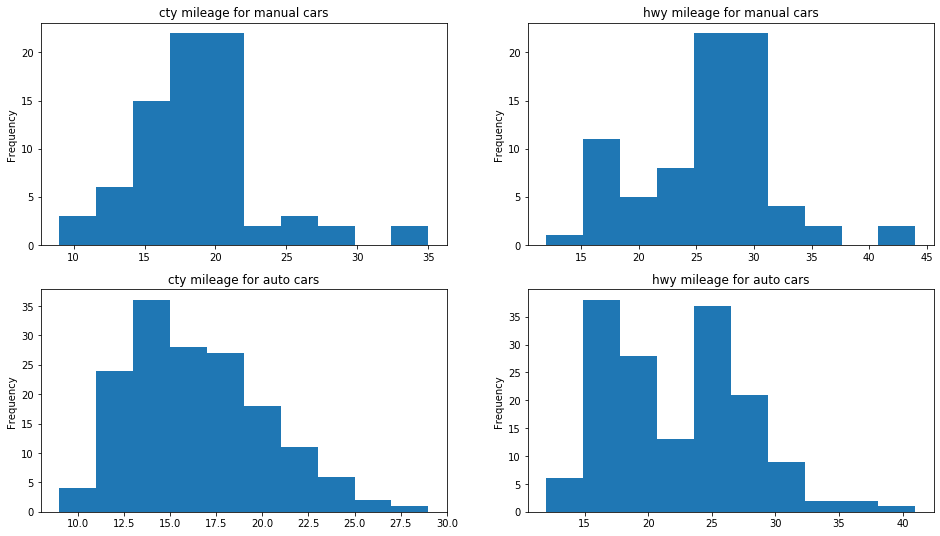

In [63]:
# The cars are grouped into manual and automatic

boolean_manual = mpg.trans.str.contains('manual')
manual_cars = mpg[boolean_manual]
manual_cars.sample(5)

boolean_auto = mpg.trans.str.contains('auto')
auto_cars = mpg[boolean_auto]
auto_cars.sample(5)

# Plot the cty and hwy mileage ditribution based on the type of the transmission

plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
plt.title('cty mileage for manual cars')
manual_cars.cty.plot(kind='hist')

plt.subplot(2,2,2)
plt.title('hwy mileage for manual cars')
manual_cars.hwy.plot(kind='hist')

plt.subplot(2,2,3)
plt.title('cty mileage for auto cars')
auto_cars.cty.plot(kind='hist')

plt.subplot(2,2,4)
plt.title('hwy mileage for auto cars')
auto_cars.hwy.plot(kind='hist')

### B. Set Hypothesis

$H_0$: Manual cars have the same gas mileage as the auto cars in cities.<br>
$H_a$: Manual cars have better gas mileage than the auto cars in cities.<br>

$H_0$: Manual cars have the same gas mileage as the auto cars in highways.<br>
$H_a$: Manual cars have better gas mileage than the auto cars in highways.<br>

### C. Set Alpha
alpha = 0.05

### D. Verify Assumption

In [85]:
auto_cars.shape

(157, 11)

In [86]:
manual_cars.shape

(77, 11)

### E. Compute test statistic and probability (t-statistic & p-value)

In [71]:
t_cty, p_cty = stats.ttest_ind(manual_cars.cty, auto_cars.cty, equal_var=False)
t_cty, p_cty

(4.537543658735826, 1.2633643745317661e-05)

In [72]:
t_hwy, p_hwy = stats.ttest_ind(manual_cars.hwy, auto_cars.hwy, equal_var=False)
t_hwy, p_hwy

(4.2815713224785, 3.3778249574249675e-05)

### F. Decide

In [73]:
t_cty > 0 and p_cty < 0.05

True

* Reject the null hpyothesis<br>
$H_a$: Manual cars have better gas mileage than the auto cars in cities.<br>

In [74]:
t_hwy > 0 and p_hwy < 0.05

True

* Reject the null hpyothesis<br>
$H_a$: Manual cars have better gas mileage than the auto cars in highways.<br>

## Correlation Exercises

### 1. Use the telco_churn data.

In [93]:
# Load Telco data ready for exploration

telco = pd.read_csv('/Users/mms3-pro/Downloads/Telco.csv')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7043 non-null   object 
 1   gender              7043 non-null   object 
 2   is_senior_citizen   7043 non-null   object 
 3   partner             7043 non-null   object 
 4   dependents          7043 non-null   object 
 5   phone_service       7043 non-null   object 
 6   internet_service    7043 non-null   object 
 7   contract_type       7043 non-null   object 
 8   payment_type        7043 non-null   object 
 9   monthly_charges     7043 non-null   float64
 10  total_charges       7043 non-null   float64
 11  churn               7043 non-null   object 
 12  monthly_tenure      7043 non-null   float64
 13  service_type        7043 non-null   object 
 14  partner_dependents  7043 non-null   object 
dtypes: float64(3), object(12)
memory usage: 825.5+ KB


### a. Does tenure correlate with monthly charges? 

### A. Plot the two continuous variables

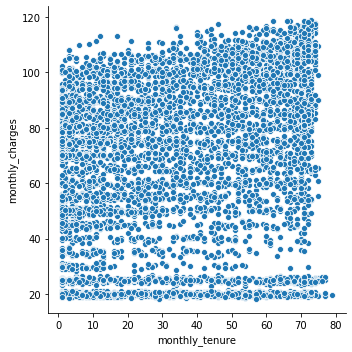

In [101]:
sns.relplot(data=telco, x='monthly_tenure', y='monthly_charges')

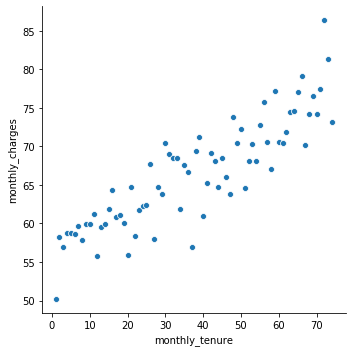

In [119]:
# Calculate the mean of the monthly charges for the monthly tenure

tenure_with_monthly_charges = telco.groupby('monthly_tenure')['monthly_charges'].mean()
tenure_with_monthly_charges = pd.DataFrame(tenure_with_monthly_charges)
tenure_with_monthly_charges.reset_index(inplace=True)

# Drop the abnormal data points

tenure_with_monthly_charges.drop([74,75,76,77], inplace=True)
tenure_with_monthly_charges.sample(5)

sns.relplot(data=tenure_with_monthly_charges, x='monthly_tenure', y='monthly_charges')

### B. Set Hypothesis

$H_0$: No linear relationship between tenure and monthly charges.<br>
$H_a$: Linear relationship exits between tenure and monthly charges.

### C. Set Alpha

alpha = 0.05

### D. Verify Assumption

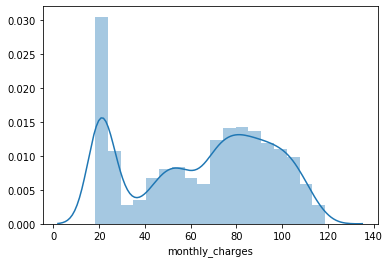

In [121]:
sns.distplot(telco.monthly_charges)

In [122]:
telco.monthly_charges.agg(['mean','median'])

mean      64.761692
median    70.350000
Name: monthly_charges, dtype: float64

### E. Calculate statistic and p-value

In [123]:
x = tenure_with_monthly_charges.monthly_tenure
y = tenure_with_monthly_charges.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

(0.8730287593051758, 3.749018368566803e-24)

### F. Decide

Reject the $H_0$ and accept the althernative: Linear relationship exits between tenure and monthly charges

In [124]:
p < 0.05

True

### Total charges? What happens if you control for phone and internet service?
### A. Scatter Plot the Two Variables

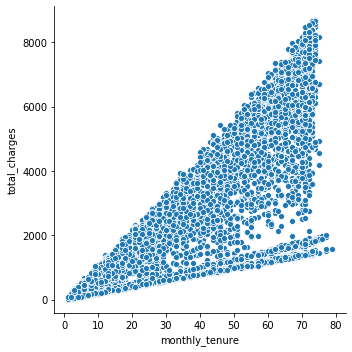

In [125]:
sns.relplot(data=telco, x='monthly_tenure', y='total_charges')

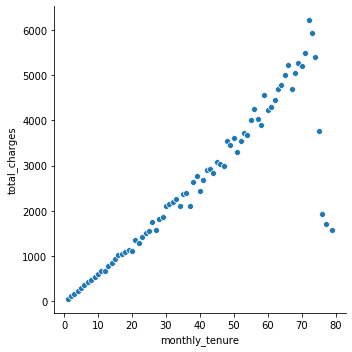

In [130]:
tenure_with_total_charges = telco.groupby('monthly_tenure')['total_charges'].mean()
tenure_with_total_charges = pd.DataFrame(tenure_with_total_charges)
tenure_with_total_charges.reset_index(inplace=True)
tenure_with_total_charges.sample(5)

sns.relplot(data=tenure_with_total_charges, x='monthly_tenure', y='total_charges')

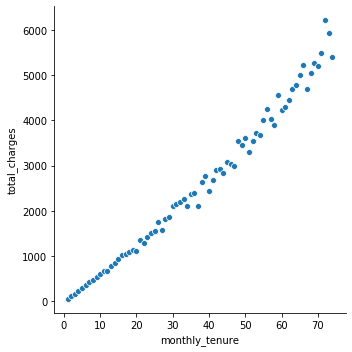

In [131]:
# Remove the abnormal datapoints

tenure_with_total_charges.drop([74,75,76,77], inplace=True)
sns.relplot(data=tenure_with_total_charges, x='monthly_tenure', y='total_charges')

### B. Set Hypothesis

$H_0$: No correlationship exits between tenure and total charges.<br>
$H_a$: Correlationship exits between tenure and total charges.

### C. Set Alpha

alpha = 0.05

### D. Verify Assumption

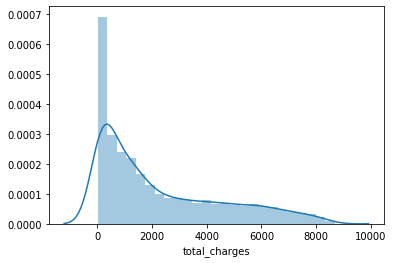

In [132]:
sns.distplot(telco.total_charges)

In [133]:
telco.total_charges.agg(['mean', 'median'])

mean      2279.798992
median    1394.550000
Name: total_charges, dtype: float64

### E. Calculate statistic and p-value

In [135]:
x = tenure_with_total_charges.monthly_tenure
y = tenure_with_total_charges.total_charges

r, p = stats.pearsonr(x, y)
r, p

(0.9916832349538083, 7.338095108929428e-66)

### F. Decide

* Reject null hypothesis and accept 'Correlationship exits between tenure and total charges.'

In [136]:
p < 0.05

True

### C. What happens if you control for phone and internet service?

In [143]:
telco.phone_service.unique()

array(['One Line', 'Two or More Lines', 'No Phone Service'], dtype=object)

### A. Plot monthly charges against tenure for each type of phone service. 

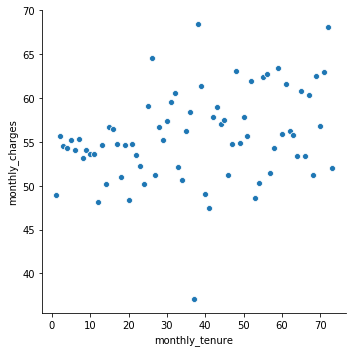

In [203]:
# One line phone service

boolean_one_line = telco.phone_service == 'One Line'
one_line = telco[boolean_one_line]
one_line.sample(5)

oneline_monthly = one_line.groupby('monthly_tenure').monthly_charges.mean()
oneline_monthly = pd.DataFrame(oneline_monthly)
oneline_monthly.reset_index(inplace=True)
oneline_monthly.drop([73,74,75,76], inplace=True)
oneline_monthly.tail()

sns.relplot(data=oneline_monthly, x='monthly_tenure', y='monthly_charges')

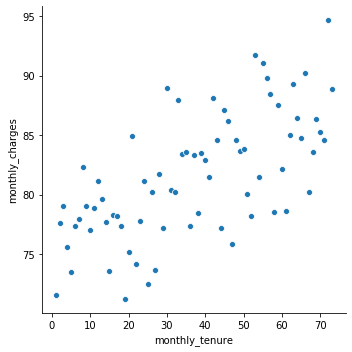

In [213]:
# Two or more lines

boolean_more_line = telco.phone_service == 'Two or More Lines'
more_line = telco[boolean_more_line]
more_line.sample(5)

more_line_monthly = more_line.groupby('monthly_tenure').monthly_charges.mean()
more_line_monthly = pd.DataFrame(more_line_monthly)
more_line_monthly.reset_index(inplace=True)
more_line_monthly.drop([73,74,75,76], inplace=True)
more_line_monthly.tail()

sns.relplot(data=more_line_monthly, x='monthly_tenure', y='monthly_charges')

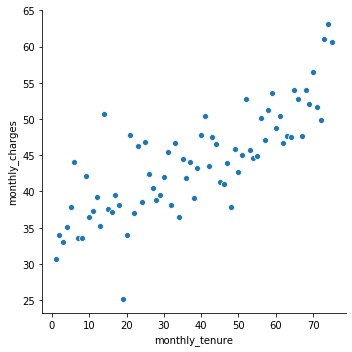

In [205]:
boolean_no_line = telco.phone_service == 'No Phone Service'
no_line = telco[boolean_no_line]
no_line.sample(5)

noline_monthly = no_line.groupby('monthly_tenure').monthly_charges.mean()
noline_monthly = pd.DataFrame(noline_monthly)
noline_monthly.reset_index(inplace=True)
noline_monthly.tail()

sns.relplot(data=noline_monthly, x='monthly_tenure', y='monthly_charges')

### D. Set Hypothesis

$H_0$: There is no correlation between tenure and monthly charges in one line/two line/no phone service. 
$H_a$: There is correlation between tenure and monthly charges in one line/two line/no phone service. 

### C. Set Alpha
alpha = 0.05

### D. Verify Assumption

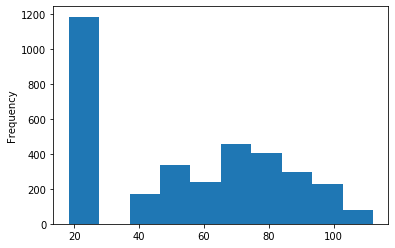

In [206]:
one_line.monthly_charges.plot.hist()

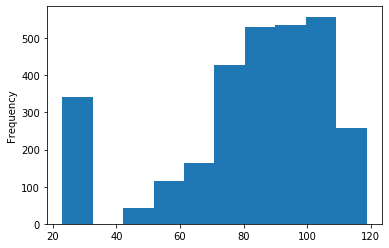

In [215]:
more_line.monthly_charges.plot.hist()

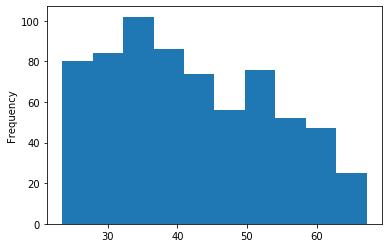

In [208]:
no_line.monthly_charges.plot.hist()

### E. Calculate statistics and p-value
### F. Decide

In [210]:
x = oneline_monthly.monthly_tenure
y = oneline_monthly.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.31424044873729295, 0.006779524031266351)

In [216]:
x = more_line_monthly.monthly_tenure
y = more_line_monthly.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.6566181677206118, 2.8341801682881433e-10)

In [212]:
x = noline_monthly.monthly_tenure
y = noline_monthly.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.799996445721213, 7.375558381208825e-18)

### 2. Use the employees database.

In [224]:
# from env import host, user, password

# url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
# query = 'select * from salaries;'

# salaries = pd.read_sql(query, url)
# salaries.sample(5)

# salaries.to_csv('/Users/mms3-pro/Documents/employees_database/salaries.csv', index=False)

In [236]:
salaries = pd.read_csv('/Users/mms3-pro/Documents/employees_database/salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


### 2-1. Is there a relationship between how long an employee has been with the company and their salary?

In [238]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [245]:
# One employee may have more than one salaries, due to promotion or job changes

salaries[salaries.emp_no==10001]

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [330]:
# The most recent salary for each employee is kept.

most_recent = salaries.drop_duplicates(subset=['emp_no'],keep='last')
most_recent.reset_index(inplace=True)
most_recent.head()

,index,emp_no,salary,from_date,to_date
0,16,10001,88958,2002-06-22,9999-01-01
1,22,10002,72527,2001-08-02,9999-01-01
2,29,10003,43311,2001-12-01,9999-01-01
3,45,10004,74057,2001-11-27,9999-01-01
4,58,10005,94692,2001-09-09,9999-01-01


In [331]:
most_recent.iloc[0]

index                16
emp_no            10001
salary            88958
from_date    2002-06-22
to_date      9999-01-01
Name: 0, dtype: object

In [332]:
# Convert from_date to date

from datetime import datetime
from datetime import date

most_recent['start'] = most_recent.from_date.apply(lambda i: 
                                                   datetime.strptime(i, "%Y-%m-%d").date()
                                                  )
most_recent.sample(5)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,emp_no,salary,from_date,to_date,start
24045,228441,34046,73355,2002-02-10,9999-01-01,2002-02-10
168569,1599824,268545,66471,2002-04-17,9999-01-01,2002-04-17
271376,2573089,471352,87050,2002-02-06,9999-01-01,2002-02-06
279466,2649622,479442,67011,2001-11-23,9999-01-01,2001-11-23
108647,1032368,208623,51501,2002-01-07,9999-01-01,2002-01-07


In [333]:
most_recent['end'] = most_recent.to_date.apply(lambda i: 
                                               date.today() if i == '9999-01-01'
                                               else datetime.strptime(i, "%Y-%m-%d").date()
                                              )
most_recent.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,emp_no,salary,from_date,to_date,start,end
0,16,10001,88958,2002-06-22,9999-01-01,2002-06-22,2020-09-04
1,22,10002,72527,2001-08-02,9999-01-01,2001-08-02,2020-09-04
2,29,10003,43311,2001-12-01,9999-01-01,2001-12-01,2020-09-04
3,45,10004,74057,2001-11-27,9999-01-01,2001-11-27,2020-09-04
4,58,10005,94692,2001-09-09,9999-01-01,2001-09-09,2020-09-04


In [339]:
most_recent['tenure'] = (((most_recent.end - most_recent.start).dt.days)/30).round()
most_recent.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,emp_no,salary,from_date,to_date,start,end,tenure
0,16,10001,88958,2002-06-22,9999-01-01,2002-06-22,2020-09-04,222.0
1,22,10002,72527,2001-08-02,9999-01-01,2001-08-02,2020-09-04,232.0
2,29,10003,43311,2001-12-01,9999-01-01,2001-12-01,2020-09-04,228.0
3,45,10004,74057,2001-11-27,9999-01-01,2001-11-27,2020-09-04,229.0
4,58,10005,94692,2001-09-09,9999-01-01,2001-09-09,2020-09-04,231.0


In [346]:
most_recent.sample(10)

,index,emp_no,salary,from_date,to_date,start,end,tenure
123757,1175649,223733,69974,2002-04-18,9999-01-01,2002-04-18,2020-09-04,224.0
198815,1886225,298791,82373,2001-08-19,2002-04-01,2001-08-19,2002-04-01,8.0
250468,2375631,450444,69292,2002-01-06,9999-01-01,2002-01-06,2020-09-04,227.0
186606,1770492,286582,61947,2002-01-22,9999-01-01,2002-01-22,2020-09-04,227.0
280858,2662663,480834,65759,2002-04-28,9999-01-01,2002-04-28,2020-09-04,223.0
30025,285168,40026,66647,2001-09-17,9999-01-01,2001-09-17,2020-09-04,231.0
139156,1321115,239132,75247,2002-04-28,2002-05-17,2002-04-28,2002-05-17,1.0
243388,2307764,443364,70282,2001-10-30,9999-01-01,2001-10-30,2020-09-04,229.0
153817,1460267,253793,70712,2001-11-20,9999-01-01,2001-11-20,2020-09-04,229.0
107107,1017845,207083,77087,2002-04-25,9999-01-01,2002-04-25,2020-09-04,224.0


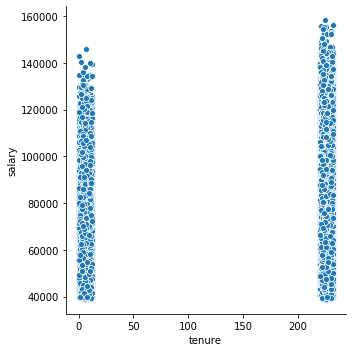

In [341]:
sns.relplot(data=most_recent, x='tenure', y='salary')

In [348]:
salary_over_time = most_recent.groupby('tenure').salary.mean() 
salary_over_time = pd.DataFrame(salary_over_time)
salary_over_time.reset_index(inplace=True)



,tenure,salary
0,0.0,61611.641817
1,1.0,61493.754679
2,2.0,61556.968105
3,3.0,61614.280638
4,4.0,61975.673744
5,5.0,61704.783755
6,6.0,61441.825459
7,7.0,61728.363285
8,8.0,61447.206375
9,9.0,61903.229134


In [351]:
x = salary_over_time.tenure
y = salary_over_time.salary

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.9865407442549567, 2.178518793789294e-20)

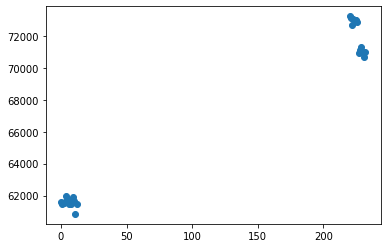

In [350]:
plt.scatter(x,y)

In [254]:
# Calcuate how long every employee has been working in the company. 
# Convert str time to datetime time

from datetime import datetime
date1 = datetime.strptime('2020-09-04', "%Y-%m-%d").date()
date2 = datetime.strptime('2019-09-04', "%Y-%m-%d").date()

print(date1, date2)

2020-09-04 2019-09-04


In [262]:
(date1 - date2)/30

datetime.timedelta(days=12, seconds=17280)

In [265]:
from datetime import date
date.today()

datetime.date(2020, 9, 4)

In [297]:
datetime.today()

datetime.datetime(2020, 9, 4, 18, 10, 7, 600765)